In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime

import sys
sys.path.append('src')

In [3]:
from gecko.data import JPEGDataLoader

In [4]:
loader = JPEGDataLoader(camera='c2')

In [5]:
loader.base_url

'https://soho.nascom.nasa.gov/data/REPROCESSING/Completed/<<<YEAR>>>/c2/'

In [9]:
from functools import reduce
from PIL import Image

In [14]:
start_datetime = datetime.datetime(2023, 12, 9, 0, 0, 0)
end_datetime = datetime.datetime(2023, 12, 9, 2, 59, 0)

images = [loader.get_image(x) for x in loader.ls_images(start_datetime, end_datetime)]
alpha = round(255/len(images)) + 5
for img in images:
    img.putalpha(alpha)
composed_img = reduce(Image.alpha_composite, images)

In [20]:
from gecko.transform import Blender

In [21]:
blender = Blender()

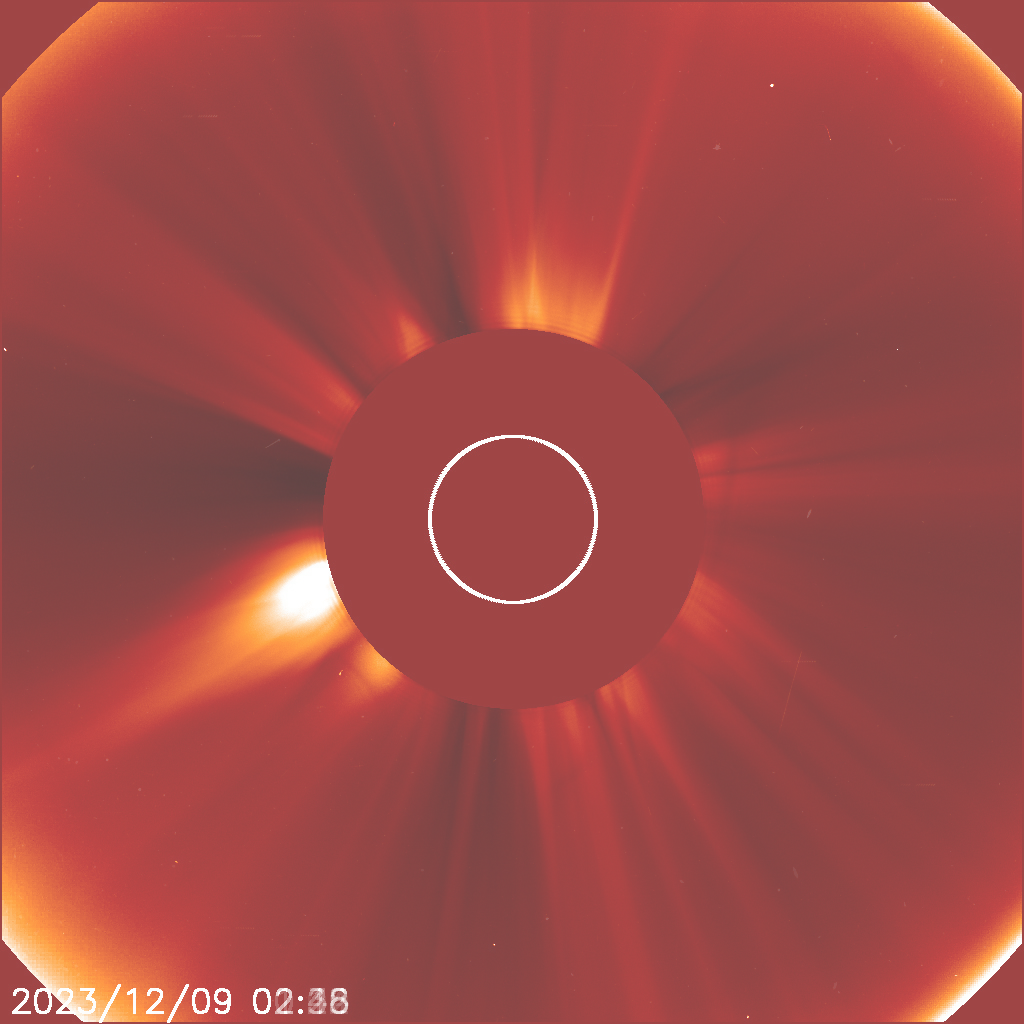

In [22]:
blender.blend(images)

In [125]:
img_pil = Image.open(
    '/home/artkra/PERSONAL/sungrazer/gecko/data/soho/jpeg/c2/20231210/20231210_0000_c2_1024.jpg'
).convert('RGBA') 
img_pil.putalpha(200)
img = np.asarray(img_pil)


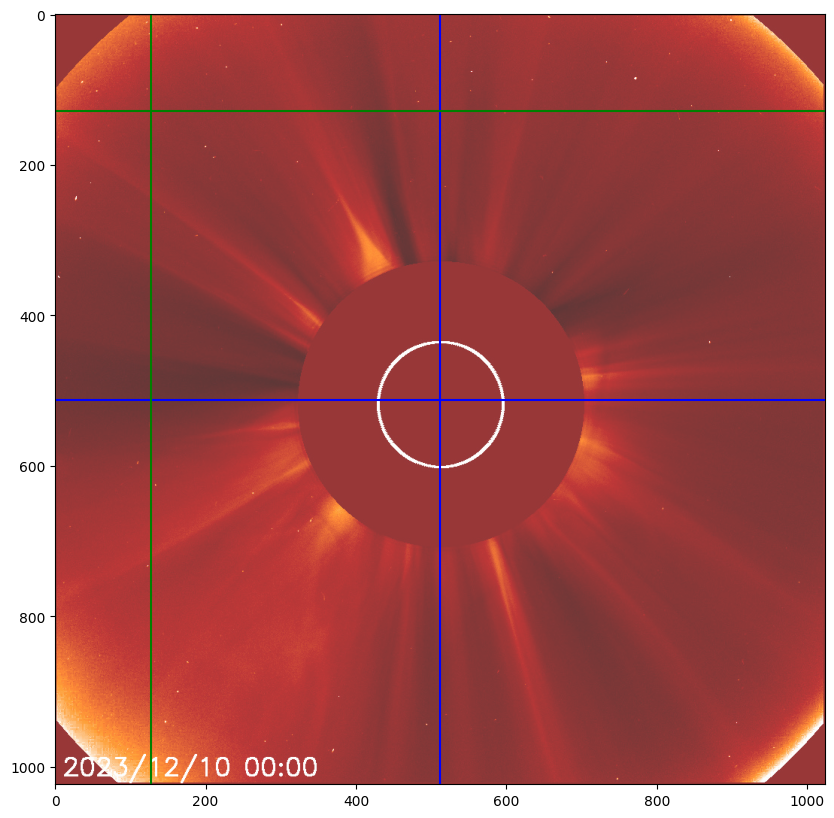

In [127]:
fig, ax = plt.subplots(figsize=(10, 10), sharex=True, sharey=True)
ax.axhline(2<<8, color='blue')
ax.axvline(2<<8, color='blue')
ax.axhline(2<<6, color='green')
ax.axvline(2<<6, color='green')

imgplot = plt.imshow(img, cmap='gray')

In [47]:
2<<8

512